## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [2]:
!head Data/countries_info.csv 

country_name,area,population,literacy
afghanistan,647500,31056997,"36,0"
albania,28748,3581655,"86,5"
algeria,2381740,32930091,"70,0"
argentina,2766890,39921833,"97,1"
armenia,29800,2976372,"98,6"
australia,7686850,20264082,"100,0"
austria,83870,8192880,"98,0"
azerbaijan,86600,7961619,"97,0"
bahrain,665,698585,"89,1"


In [3]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [4]:
happiness = pd.read_csv(HAPPINESS_DATASET, sep=',')
countries = pd.read_csv(COUNTRIES_DATASET, sep=',')

In [5]:
happiness.head(3)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa


In [6]:
countries.head(3)

,country_name,area,population,literacy
0,afghanistan,647500,31056997,"36,0"
1,albania,28748,3581655,"86,5"
2,algeria,2381740,32930091,"70,0"


## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [7]:
country_features = happiness.merge(countries, left_index=True, right_index=True) #Merge with their index
country_features = country_features.drop('country_name', axis=1)
country_features.head(2)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,"36,0"
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,"86,5"


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [8]:
#country_features.happiness_score.sort_values(ascending=False).head(10) 
country_features[['country','happiness_score']].sort_values(ascending=False, by=['happiness_score']).head(10)


,country,happiness_score
38,Finland,7.8087
31,Denmark,7.6456
115,Switzerland,7.5599
50,Iceland,7.5045
92,Norway,7.4880
87,Netherlands,7.4489
114,Sweden,7.3535
88,New Zealand,7.2996
6,Austria,7.2942
72,Luxembourg,7.2375


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [9]:
# FIRST METHOD :
# world_region = country_features[['world_region', 'happiness_score']]
# world_region['number of country'] = 1

# # Group by 'world_region' and sum 'happiness_score'and 'country'
# result_df = world_region.groupby('world_region')[['happiness_score', 'number of country']].sum().reset_index()
# result_df['happiness_score'] = result_df['happiness_score'] / result_df['number of country']

# # Display and sort the result 
# result_df.sort_values(ascending=False, by=['happiness_score']).head(10)

# SECOND METHOD : (easier)
result_df = country_features.groupby('world_region').agg(
    happiness_score=('happiness_score', 'mean'),
    number_of_country=('world_region', 'count')
).reset_index()

result_df.sort_values(by='happiness_score', ascending=False).head(10)

,world_region,happiness_score,number_of_country
5,North America and ANZ,7.173525,4
9,Western Europe,6.967405,20
3,Latin America and Caribbean,5.971280,20
0,Central and Eastern Europe,5.891393,14
7,Southeast Asia,5.517788,8
2,East Asia,5.483633,3
1,Commonwealth of Independent States,5.358342,12
4,Middle East and North Africa,5.269306,16
8,Sub-Saharan Africa,4.393856,32
6,South Asia,4.355083,6


The first region has only a few countries! What are them and what is their score?

In [10]:
# Filter the DataFrame to include only the desired world region
country_features[country_features['world_region'] == 'North America and ANZ'][['world_region','country','happiness_score']].head(5)


,world_region,country,happiness_score
5,North America and ANZ,Australia,7.2228
21,North America and ANZ,Canada,7.2321
88,North America and ANZ,New Zealand,7.2996
127,North America and ANZ,United States,6.9396


## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [11]:
high_literacy_countries = country_features[country_features['literacy'] == '100,0'][['world_region', 'country', 'happiness_score', 'literacy']]
high_literacy_countries['formatted_info'] = high_literacy_countries.apply(lambda row: f"{row['world_region']} - {row['country']} ({row['happiness_score']})", axis=1)

high_literacy_countries.head(10)

,world_region,country,happiness_score,literacy,formatted_info
5,North America and ANZ,Australia,7.2228,"100,0",North America and ANZ - Australia (7.222799778)
31,Western Europe,Denmark,7.6456,"100,0",Western Europe - Denmark (7.645599842)
38,Western Europe,Finland,7.8087,"100,0",Western Europe - Finland (7.808700085)
72,Western Europe,Luxembourg,7.2375,"100,0",Western Europe - Luxembourg (7.237500191)
92,Western Europe,Norway,7.4880,"100,0",Western Europe - Norway (7.487999916000001)


What is the global average?

In [12]:
# Calculate the global average of a specific column
global_average = country_features['happiness_score'].mean()

print(f"The global average of {'happiness_score'} is: {global_average}")

The global average of happiness_score is: 5.525062216659259


Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [13]:
# First : see the data type of this column (object)
column_data_type = country_features['literacy'].dtypes
print(column_data_type)

object


In [14]:
# Replace commas with dots and convert to float
country_features['literacy'] = country_features['literacy'].str.replace(',', '.').astype(float)

# Calculate the proportion of countries with literacy below 50%
below_50_percent = (len(country_features[country_features['literacy'] < 50.0]) / len(country_features)) * 100

# Print the proportion formatted with 2 decimals
print(f"The proportion of countries with literacy below 50% is: {below_50_percent:.2f}%")

# f": This indicates the start of a formatted string literal (f-string).

The proportion of countries with literacy below 50% is: 11.85%


Print the raw number and the percentage of world population that is illiterate.

In [15]:
illiterate = country_features[country_features['literacy'] < 50.0][['population']]
percentage_illiterate = illiterate['population'].sum() / country_features['population'].sum() * 100

# Print the percentage formatted with 2 decimals and the raw number
print(illiterate.index)
print(f"The percentage f world population that is illiterate is: {percentage_illiterate:.2f}%")


Index([0, 9, 12, 17, 22, 37, 46, 54, 77, 79, 85, 86, 90, 93, 104, 106], dtype='int64')
The percentage f world population that is illiterate is: 9.45%


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [16]:
country_features['population_density'] = country_features['population'] / country_features['area']
country_features.head(5)

,country,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy,population_density
0,Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0,47.964474
1,Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5,124.587971
2,Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0,13.826065
3,Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1,14.428413
4,Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6,99.878255


What is the happiness score of the 3 countries with the lowest population density?

In [20]:
#Sort the DataFrame by 'population_density' in ascending order
lowest_population_density = country_features[['country', 'happiness_score', 'population_density']].sort_values(ascending=True, by=['population_density'])

#Select the top three rows
lowest_population_density.head(3)

,country,happiness_score,population_density
83,Mongolia,5.4562,1.810751
5,Australia,7.2228,2.636201
14,Botswana,3.4789,2.731371


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

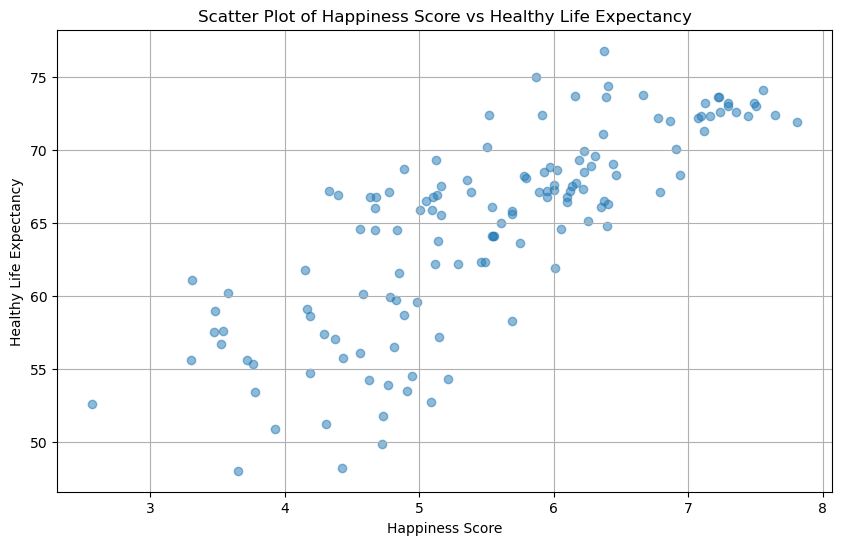

In [29]:
import matplotlib.pyplot as plt

# Extract the data for the scatter plot
x = country_features['happiness_score']
y = country_features['healthy_life_expectancy']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(x, y, alpha=0.5)  # Create the scatter plot - the alpha number is for the darkness of the points
plt.title('Scatter Plot of Happiness Score vs Healthy Life Expectancy')  # Set the title
plt.xlabel('Happiness Score')  # Set the x-axis label
plt.ylabel('Healthy Life Expectancy')  # Set the y-axis label
plt.grid(True)  # Add a grid
plt.show()  # Show the plot


Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.